<p style = "font-size : 42px; color : 	#E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Diabetes Disease Classification</strong></p>


<img src="https://st.depositphotos.com/1003593/4010/i/600/depositphotos_40105485-stock-photo-diabetes-blue-marker.jpg" alt="Diabetes symptoms Stock Photos &amp;amp; Royalty-Free Images | Depositphotos" jsname="HiaYvf" jsaction="load:XAeZkd;" class="n3VNCb" data-noaft="1" style="margin-left: 5%; float: center;  border:5px solid ; width:80%; height : 100%;">

<a id = '0.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 

* [Details about the dataset](#1.0)
* [Importing libraries](#1.0)
* [Importing dataset](#2.0)
* [Basic Data Exploration(Understanding the Dataset](#3.0)
* [Data Cleaning](#0.0)
    * [Checking for null values](#5.0)
    * [delete data duplicated](#6.0)
    * [Check Qutliers](#7.0)
* [Exploratory Data Analysis (EDA)](#8.0)
* [Check Co-relation](#9.0)
* [ Separate dependent & independent features](#6.0)
* [Splitting Dataset](#7.0)
* [Models Building](#8.0)
* [Models Performance Evaluation](#9.0)

<a id = '1.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Details about the dataset</strong></p>

1. Pregnancies decribes the number of times the person has been pregnant.
2. Gluose describes the blood glucose level on testing.
3. Blood pressure describes the diastolic blood pressure.
4. Skin Thickenss describes the skin fold thickness of the triceps.
5. Insulin describes the amount of insulin in a 2hour serum test.
6. BMI describes his body mass index.
7. DiabetesPedigreeFunction describes the family history of the person.
8. Age describes the age of the person
9. Patient_no describes number id 
10. Outcome describes if the person has diabetes or not.

<a id = '2.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Importing libaraies</strong></p>

In [10]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

<a id = '3.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Importing dataset</strong></p>

In [11]:
data = pd.read_csv('C:/Users/1/Desktop/diabetes.csv')

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Basic Data Exploration(Understanding the Dataset)</strong></p>

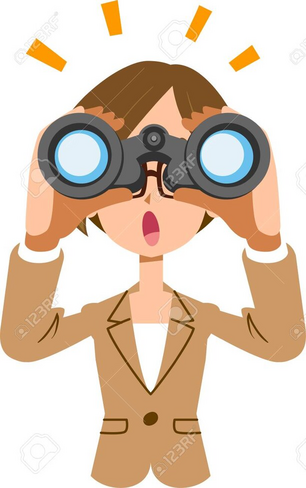

In [12]:
data.head()

Pregnancies  Glucose  BloodPressure  patient_no  SkinThickness  Insulin  \
0            6      148             72           1             35        0   
1            1       85             66           2             29        0   
2            8      183             64           3              0        0   
3            1       89             66           4             23       94   
4            0      137             40           5             35      168   

    BMI  DiabetesPedigreeFunction  Age  Outcome  
0  33.6                     0.627   50        1  
1  26.6                     0.351   31        0  
2  23.3                     0.672   32        1  
3  28.1                     0.167   21        0  
4  43.1                     2.288   33        1

In [13]:
data.shape

(768, 10)

In [14]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   patient_no                768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [15]:
#The described method will help to see how data has been spread for numerical values.
# We can clearly see the minimum value, mean values, different percentile values, and maximum values.
data.describe(include='all').T

count        mean         std     min        25%  \
Pregnancies               768.0    3.845052    3.369578   0.000    1.00000   
Glucose                   768.0  120.894531   31.972618   0.000   99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000   62.00000   
patient_no                768.0  384.500000  221.846794   1.000  192.75000   
SkinThickness             768.0   20.536458   15.952218   0.000    0.00000   
Insulin                   768.0   79.799479  115.244002   0.000    0.00000   
BMI                       768.0   31.992578    7.884160   0.000   27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078    0.24375   
Age                       768.0   33.240885   11.760232  21.000   24.00000   
Outcome                   768.0    0.348958    0.476951   0.000    0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
patient_no                384.5000  576.25000  768.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [16]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'patient_no',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

<a id = '0.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #006400; border-radius: 5px 5px;"><strong>Data Cleaning</strong></p>


* Drop not related values
* Checking for null values. 
* Drop invalid values.
* Drop outlier.

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Drop not related values</strong></p>


In [17]:
data=data.drop(["patient_no"],axis=1) 
data.shape

(768, 9)

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Checking for null values</strong></p>


In [18]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

Null Values  Percentage Null Values
Outcome                             0                     0.0
Age                                 0                     0.0
DiabetesPedigreeFunction            0                     0.0
BMI                                 0                     0.0
Insulin                             0                     0.0
SkinThickness                       0                     0.0
BloodPressure                       0                     0.0
Glucose                             0                     0.0
Pregnancies                         0                     0.0

* Invalid data

In [19]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    data[col].replace(0,np.NaN,inplace=True)

In [20]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

Null Values  Percentage Null Values
Insulin                           374               48.697917
SkinThickness                     227               29.557292
BloodPressure                      35                4.557292
BMI                                11                1.432292
Glucose                             5                0.651042
Outcome                             0                0.000000
Age                                 0                0.000000
DiabetesPedigreeFunction            0                0.000000
Pregnancies                         0                0.000000

In [21]:
# We can fill in NaN values with a median according to the target
for col in data.columns:
    data.loc[(data["Outcome"]==0) & (data[col].isnull()),col] = data.loc[(data["Outcome"]==0), col].median()
    data.loc[(data["Outcome"]==1) & (data[col].isnull()),col] = data.loc[(data["Outcome"]==1), col].median()

In [22]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

Null Values  Percentage Null Values
Outcome                             0                     0.0
Age                                 0                     0.0
DiabetesPedigreeFunction            0                     0.0
BMI                                 0                     0.0
Insulin                             0                     0.0
SkinThickness                       0                     0.0
BloodPressure                       0                     0.0
Glucose                             0                     0.0
Pregnancies                         0                     0.0

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>delete data duplicated</strong></p>

In [23]:
duplicate = data.duplicated()
print(duplicate.sum())

0


<a id = '7.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Check Qutliers</strong></p>

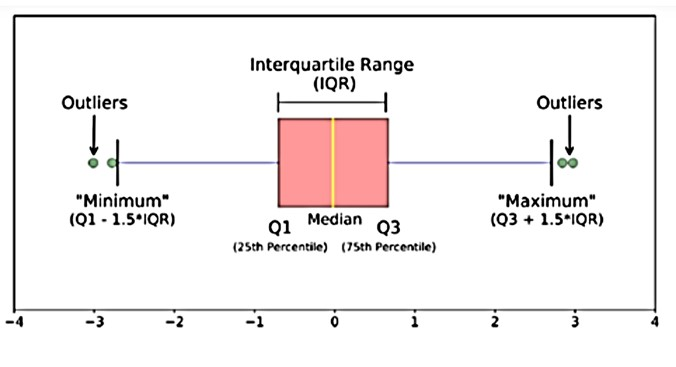

In [24]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [25]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    print(variable, "no")

In [26]:
for col in data.columns:
    has_outliers(data, col)

Pregnancies no
Glucose no
BloodPressure no
SkinThickness yes
SkinThickness no
Insulin yes
Insulin no
BMI no
DiabetesPedigreeFunction yes
DiabetesPedigreeFunction no
Age no
Outcome no


In [27]:
## function to get ride of qutliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [28]:
replace_with_thresholds(data, data.columns)

In [29]:
for col in data.columns:
    has_outliers(data, col)

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p>

In [30]:
from dataprep.eda import create_report

DataPrep Report
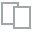
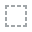
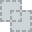
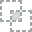
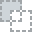
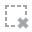
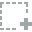
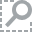
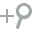
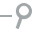
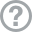
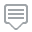
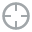
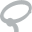
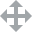
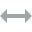
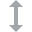
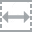
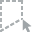
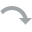
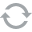
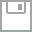
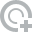
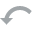
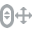
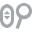
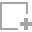
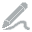
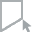
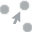
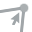
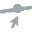

In [31]:
create_report(data)

<a id = '9.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Check Co-relation</strong></p>


In [32]:
corelation = pd.DataFrame({'corelation' : data.corr(method='spearman')["Outcome"].abs().sort_values(ascending=False)[1:]})
corelation

corelation
Insulin                     0.563026
Glucose                     0.485358
SkinThickness               0.358751
BMI                         0.312524
Age                         0.309040
Pregnancies                 0.198689
BloodPressure               0.186925
DiabetesPedigreeFunction    0.175360

<AxesSubplot:>

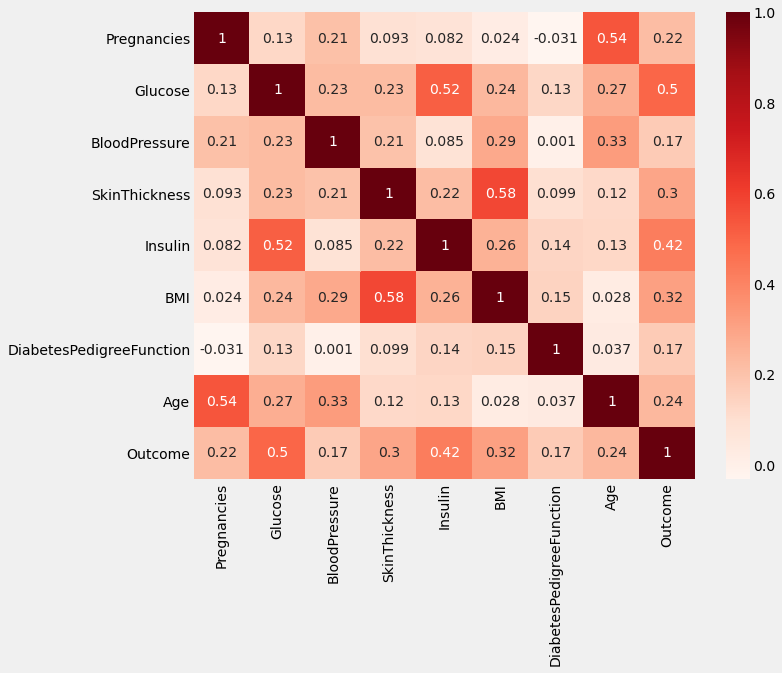

In [33]:
plt.figure(figsize=(10,8))
corelation = data.corr()
sns.heatmap(corelation,annot=True,cmap="Reds")

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Separate dependent & independent features</strong></p>


In [34]:
y=data['Outcome']
X=data.drop('Outcome',axis=1)
cols=X.columns
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

<a id = '7.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>I Select best features for model</strong></p>


In [35]:
# Import Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 , f_classif

In [36]:
print('Original X Shape is ' , X.shape)

Original X Shape is  (768, 8)


In [37]:
## Feature Selection by KBest 
FeatureSelection = SelectKBest(score_func= chi2 ,k=5) # score_func can = f_classif 
X = FeatureSelection.fit_transform(X, y)

In [38]:
# let's print the number of total and selected features
FeatureSelection = cols[(FeatureSelection.get_support())]

In [39]:
# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(FeatureSelection)))

total features: 5
selected features: 5


In [40]:
FeatureSelection

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'Age'], dtype='object')

In [41]:
Feature_Selection=data[FeatureSelection]
Feature_Selection.head()

Pregnancies  Glucose  SkinThickness  Insulin   Age
0          6.0    148.0           35.0    169.5  50.0
1          1.0     85.0           29.0    102.5  31.0
2          8.0    183.0           32.0    169.5  32.0
3          1.0     89.0           23.0     94.0  21.0
4          0.0    137.0           35.0    168.0  33.0

<a id = '7.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Splitting Dataset</strong></p>


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)

In [43]:
# Import Libraries
from sklearn.preprocessing import StandardScaler

In [44]:
#Creating a StandardScaler object to normalize the X train and test set feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [45]:
#showing data
print('X \n' , X_train[:10])

X 
 [[ 1.50755225 -1.09892515 -0.2528179  -0.49893176 -0.04863985]
 [-0.82986389 -0.13360933  0.77350004 -0.60914019 -0.88246592]
 [-1.12204091 -1.03235165 -0.2528179  -0.49893176 -0.5489355 ]
 [ 2.38408331  0.59869923  1.57174733  2.38593603  2.03592532]
 [ 1.50755225  0.76513299  1.91385331 -0.14237507  0.53503839]
 [ 0.04666716  1.06471377  0.2033234   1.85434242 -0.88246592]
 [-1.12204091 -0.66619737 -0.2528179  -0.49893176 -1.04923114]
 [ 1.21537524 -0.76605763 -0.2528179  -0.49893176  1.36886446]
 [-0.82986389 -0.36661659 -1.84931248  0.53184122 -0.88246592]
 [-1.12204091  0.56541248 -1.39317117  0.89488077 -1.04923114]]


<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Models Building</strong></p>


In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
models = []
models.append(('RandomForest', RandomForestClassifier(max_depth=2, ccp_alpha=0.002 )))

RandomForest
Predicted Value for KNNClassifierModel is :  [1. 0. 0. 1. 0. 0. 1. 1. 0. 1.]
Prediction Probabilities Value for KNNClassifierModel is :  [[0.31813401 0.68186599]
 [0.89023352 0.10976648]
 [0.93446787 0.06553213]
 [0.35240525 0.64759475]
 [0.90645344 0.09354656]
 [0.92575522 0.07424478]
 [0.2479891  0.7520109 ]
 [0.30772719 0.69227281]
 [0.54909861 0.45090139]
 [0.3623045  0.6376955 ]]
Confusion Matrix is : 
 [[117  13]
 [  4  58]]


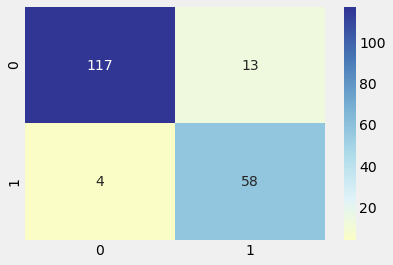

0.9114583333333334


              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93       130
         1.0       0.82      0.94      0.87        62

    accuracy                           0.91       192
   macro avg       0.89      0.92      0.90       192
weighted avg       0.92      0.91      0.91       192



In [48]:
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    # Make predictions.
    predictions = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    print('Predicted Value for KNNClassifierModel is : ' , predictions[:10])
    print('Prediction Probabilities Value for KNNClassifierModel is : ' , y_pred_prob[:10])
    # Compute the error.
    from sklearn.metrics import confusion_matrix
    CM = confusion_matrix(y_test, predictions)
    print('Confusion Matrix is : \n', CM)
    
    # drawing confusion matrix
    sns.heatmap(CM, center = True , annot=True, fmt="d" ,cmap="RdYlBu")
    plt.show()
    
     # Compute accuracy
    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')
    
    #classification report
    from sklearn.metrics import classification_report
    print(classification_report(y_test,predictions))

In [49]:
x=[]
def predict_values(x):
    prediction = model.predict(scaler.transform([x]))> 0.5
    prediction_prop =  model.predict_proba(scaler.transform([x]))
    return prediction, prediction_prop 

In [50]:
predict_values([63,3,145,233,180])

(array([ True]), array([[0.35900641, 0.64099359]]))

In [51]:
# save the model to disk
model_filename = "Diabetes-disease-prediction.sav"

model_filename = joblib.dump(model, model_filename)

print('Model is saved into to disk successfully Using Job Lib')

Model is saved into to disk successfully Using Job Lib
